In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from kfx.lfp import load_potential, clean_lfp, preprocess_lfp, compute_csd

In [2]:
root = '/Users/lukearend/phd/kfx/data'
lfpfile = '2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_g0_t0.imec1.lf.bin'
recordings = pd.read_csv('/Users/lukearend/phd/kfx/ref/recordings.csv', index_col=0)

In [ ]:
root = '/Users/lukearend/phd/kfx/data/mnt/Ketamine/'\
    '2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk/'\
    '2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_g0_imec1'
lfpfile = '2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_g0_t0.imec1.lf.bin'
path = os.path.join(root, lfpfile)
firstsample = int(recordings.loc[7].lfp_start)

In [3]:
lfp = load_potential(path, startmin=5, endmin=6, offset=firstsample)
lfp = clean_lfp(lfp)
lfp = preprocess_lfp(lfp)
csd = compute_csd(lfp)

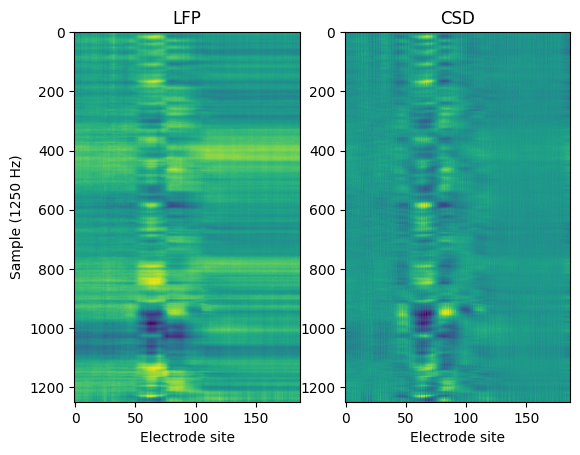

In [25]:
X1 = lfp.values
X2 = csd.values
plt.subplot(1, 2, 1)
plt.title('LFP')
plt.xlabel('Electrode site')
plt.ylabel('Sample (1250 Hz)')
plt.imshow(X1)
plt.axis('auto')
plt.subplot(1, 2, 2)
plt.title('CSD')
plt.xlabel('Electrode site')
plt.imshow(X2)
plt.axis('auto')
plt.show()